[課題のURL](https://diver.diveintocode.jp/curriculums/1906)

# Sprint17 公開されている実装を動かす

## Faster R-CNN

https://arxiv.org/pdf/1506.01497.pdf

Kerasを使用した実装です。

https://github.com/duckrabbits/ObjectDetection/tree/master

# 【問題1】学習と推定

学習が完了したことを確認した。

~~~
Epoch 10/10
 1/10 [==>...........................] - ETA: 1:27 - rpn_cls: 1.0294e-06 - rpn_regr: 0.0484 - detector_cls: 0.5490 - detector_regr: 0.2418Average number of overlapping bounding boxes from RPN = 22.1 for 10 previous iterations
 4/10 [===========>..................] - ETA: 57s - rpn_cls: 0.3780 - rpn_regr: 0.0428 - detector_cls: 0.4731 - detector_regr: 0.2977     Exception: 'NoneType' object is not subscriptable
10/10 [==============================] - 101s 10s/step - rpn_cls: 0.9550 - rpn_regr: 0.0385 - detector_cls: 0.4553 - detector_regr: 0.3051
Mean number of bounding boxes from RPN overlapping ground truth boxes: 27.90909090909091
Classifier accuracy for bounding boxes from RPN: 0.85
Loss RPN classifier: 1.2154430697509213
Loss RPN regression: 0.04347547246143222
Loss Detector classifier: 0.5232669711112976
Loss Detector regression: 0.38142350763082505
Elapsed time: 110.6779854297638[s]
training is done
-------------------------------
path to config file : ./save/train_20200623-081908_config.pickle
-------------------------------
~~~

予測を実施した。  
outputフォルダに写真が出力されていることを確認した。  
ただ、バウンディングボックスが表示されていない?  
(Tensaflow = 1.5.0, keras = 2.2.0で実施した。) 
(OpenCVのverに問題あり?)

~~~
abraham_grampa_simpson_0.jpg
[]
Elapsed time = 25.69006848335266[s]
~~~

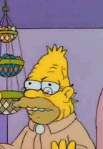

In [52]:
from IPython.display import Image
Image("./result_abraham_grampa_simpson_0.jpg")

# 【問題2】コードリーディング

Faster R-CNN[1]において重要だと考えた部分を列挙してください。  
そして、それに対応するコードを見つけてください。  

Fater R-CNNで重要なのはPRN(Region Proposal Network)の部分であり、  
下記で作成されている。  

・faster_rcnn.pyの"get_model"  
・resnet.pyの"rpn"  

# YOLOv3

https://pjreddie.com/media/files/papers/YOLOv3.pdf

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。  
YOLOv3[2]のKeras実装を使います。  

https://github.com/qqwweee/keras-yolo3

# 【問題3】学習済みの重みによる推定

学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。  
まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。  
出力結果を課題の一部として提出してください。  

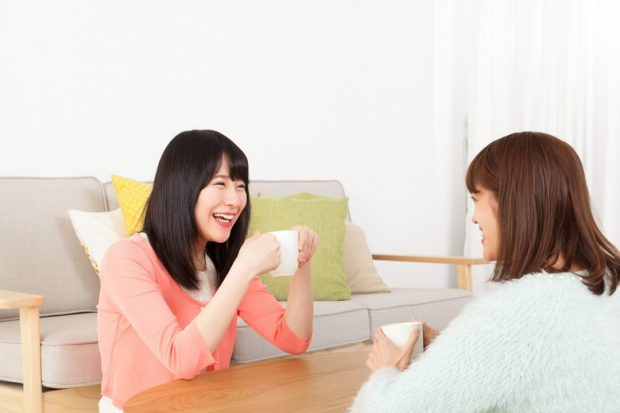

In [41]:
from IPython.display import Image
Image("./test_01.jpeg")

上記, jpeg画像の結果

~~~
Input image filename:_input_data/test_01.jpeg
(416, 416, 3)
Found 5 boxes for img
sofa 0.34 (346, 162) (620, 407)
sofa 0.84 (90, 154) (436, 376)
chair 0.33 (1, 173) (109, 407)
person 0.99 (349, 129) (619, 402)
person 1.00 (104, 126) (317, 398)
5.267682523000076
~~~

# 【問題4】学習のためのファイルを作成

新しいデータ（シンプソンズデータセット）を学習します。  
README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。  

下記、フォーマットに対応する。  
テキストエディタで置換し、one-hot-encodingのみpythonで実施した。  

~~~
Generate your own annotation file and class names file.
One row for one image;
Row format: image_file_path box1 box2 ... boxN;
Box format: x_min,y_min,x_max,y_max,class_id (no space).
For VOC dataset, try python voc_annotation.py
Here is an example:

path/to/img1.jpg 50,100,150,200,0 30,50,200,120,3
path/to/img2.jpg 120,300,250,600,2
~~~

In [ ]:
path1 = 'annotation.txt'

f = open(path1)
data1 = f.read()  # ファイル終端まで全て読んだデータを返す
f.close()
print(type(data1)) # 文字列データ
#print(data1)

In [26]:
path2 = 'class_name.txt'

f = open(path2)
data2 = f.read().split() # 改行区切り
f.close()
# print(type(data2)) # 文字列データ
print(len(data2))
print(data2)

43
['waylon_smithers', 'troy_mcclure', 'snake_jailbird', 'simpsons_dataset', 'sideshow_mel', 'sideshow_bob', 'selma_bouvier', 'ralph_wiggum', 'rainier_wolfcastle', 'professor_john_frink', 'principal_skinner', 'patty_bouvier', 'otto_mann', 'nelson_muntz', 'ned_flanders', 'moe_szyslak', 'miss_hoover', 'milhouse_van_houten', 'mayor_quimby', 'martin_prince', 'marge_simpson', 'maggie_simpson', 'lisa_simpson', 'lionel_hutz', 'lenny_leonard', 'krusty_the_clown', 'kent_brockman', 'homer_simpson', 'groundskeeper_willie', 'gil', 'fat_tony', 'edna_krabappel', 'disco_stu', 'comic_book_guy', 'cletus_spuckler', 'chief_wiggum', 'charles_montgomery_burns', 'carl_carlson', 'bart_simpson', 'barney_gumble', 'apu_nahasapeemapetilon', 'agnes_skinner', 'abraham_grampa_simpson']


In [29]:
# one-hot
data1_one_hot = data1

count = 0
for i in data2:
    #data1_one_hot.replace(i, str(count))
    data1_one_hot = data1_one_hot.replace("," + i, "," + str(count))
    count = count + 1
# print(data1_one_hot)

In [33]:
with open("annotation_one_hot.txt", mode='w') as f:
    f.write(data1_one_hot)

# 【問題5】学習が行えることの確認

問題4で作成したファイルを使用して学習してください。  
実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。  

~~~
# train.pyは、下記のように直接、ファイルパスを変更

#annotation_path = 'train.txt'
annotation_path = "annotation_one_hot.txt"
log_dir = 'logs/000/'
#classes_path = 'model_data/voc_classes.txt'
classes_path = "class_name.txt"
anchors_path = 'model_data/yolo_anchors.txt'
~~~

→下記より、学習中であることを確認した。  

~~~
Train on 6077 samples, val on 675 samples, with batch size 32.
Epoch 1/50
tcmalloc: large alloc 1594974208 bytes == 0x2ab2a000 @  0x7ffbaf3fa1e7 0x7ffb9cdadc05 0x7ffb9ebf66c9 0x7ffb9ec03165 0x7ffb9ec31829 0x7ffb9ec31cff 0x7ffb9ec3384b 0x7ffb9b34e80c 0x7ffb9b318513 0x7ffb9b306f90 0x7ffb9af9f04a 0x7ffb9af9e0f2 0x7ffbadcdca50 0x7ffbaedbe6db 0x7ffbaf0f788f
tcmalloc: large alloc 1594974208 bytes == 0x2ab2a000 @  0x7ffbaf3fa1e7 0x7ffb9cdadc05 0x7ffb9ebf66c9 0x7ffb9ec03165 0x7ffb9ec31829 0x7ffb9ec31cff 0x7ffb9ec3384b 0x7ffb9b34e80c 0x7ffb9b318513 0x7ffb9b306f90 0x7ffb9af9f04a 0x7ffb9af9e0f2 0x7ffbadcdca50 0x7ffbaedbe6db 0x7ffbaf0f788f
  1/189 [..............................] - ETA: 6:01:53 - loss: 6572.9556tcmalloc: large alloc 1594974208 bytes == 0xaef9c000 @  0x7ffbaf3fa1e7 0x7ffb9cdadc05 0x7ffb9ebf66c9 0x7ffb9ec03165 0x7ffb9ec31829 0x7ffb9ec31cff 0x7ffb9ec3384b 0x7ffb9b34e80c 0x7ffb9b318513 0x7ffb9b306f90 0x7ffb9af9f04a 0x7ffb9af9e0f2 0x7ffbadcdca50 0x7ffbaedbe6db 0x7ffbaf0f788f
tcmalloc: large alloc 1594974208 bytes == 0xaef9c000 @  0x7ffbaf3fa1e7 0x7ffb9cdadc05 0x7ffb9ebf66c9 0x7ffb9ec03165 0x7ffb9ec31829 0x7ffb9ec31cff 0x7ffb9ec3384b 0x7ffb9b34e80c 0x7ffb9b318513 0x7ffb9b306f90 0x7ffb9af9f04a 0x7ffb9af9e0f2 0x7ffbadcdca50 0x7ffbaedbe6db 0x7ffbaf0f788f
 12/189 [>.............................] - ETA: 4:44:21 - loss: 3471.3662
~~~